<a href="https://colab.research.google.com/github/maxsohl/GSB530_Covid/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#install.packages('factoextra')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘Rcpp’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’




In [1]:
library(tidyverse)  # data manipulation
library(ggplot2)
library(cluster)    # clustering algorithms
library(factoextra)
library(readr)
library(readxl)
library(cluster)


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



# **Full Dataset**

In [2]:
df = read_excel("COVID_TESTING_DATASET.xlsx")

In [3]:
# Clean data
df = na.omit(df)
df$Age_60_And_Above <- ifelse(df$Age_60_And_Above == "Yes", 1, 0)
df$Male <- ifelse(df$Sex == "male", 1, 0)
df$Positive <- ifelse(df$Result == "positive", 1, 0)
df = subset(df, select = -c(Sex,Result) )

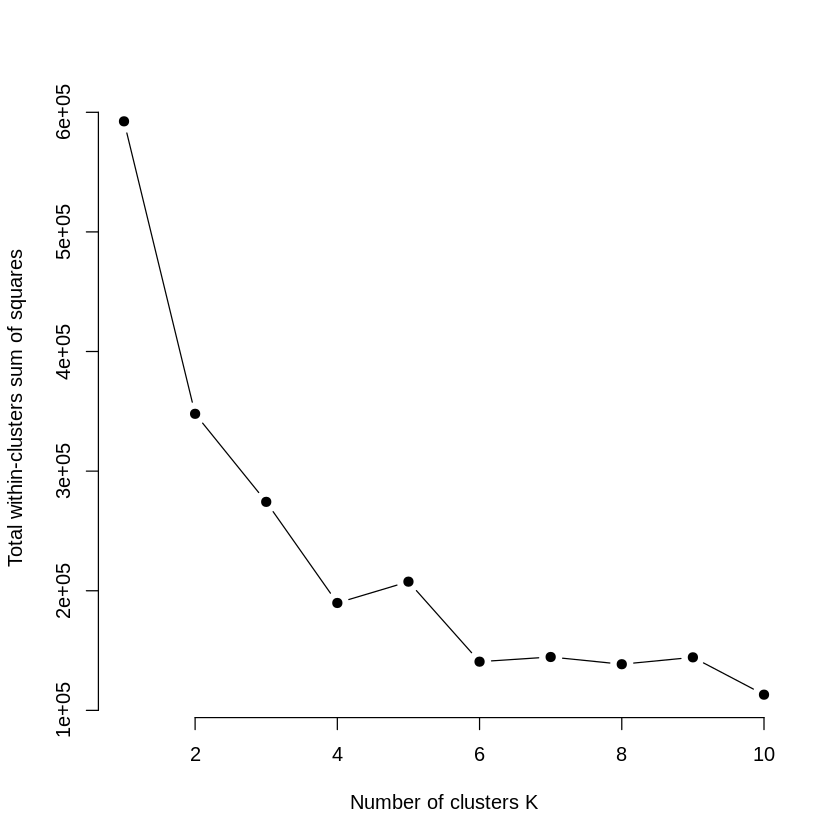

In [4]:
set.seed(123)

# function to compute total within-cluster sum of square 
wss <- function(k) {
  kmeans(df, k, nstart = 10)$tot.withinss
}

# Compute and plot wss for k = 1 to k = 15
k.values <- 1:10

# extract wss for 2-15 clusters
wss_values <- map_dbl(k.values, wss)

plot(k.values, wss_values,
       type="b", pch = 19, frame = FALSE, 
       xlab="Number of clusters K",
       ylab="Total within-clusters sum of squares")

In [26]:
km <- kmeans(df, centers = 2, nstart = 25)
km[2]

,Cough,Fever,Sore_Throat,Shortness_Of_Breath,Headache,Age_60_And_Above,Contact,Male,Positive
1,0.02676132,0.03028133,0.007783507,0.002404780,0.01786468,0.1326536,0.06386214,1,0.11323049
2,0.02834831,0.02570080,0.010729400,0.003173036,0.02121794,0.1338348,0.06604055,0,0.09777688


# **Male Subset:**

In [7]:
males = df[df$Male == 1,]

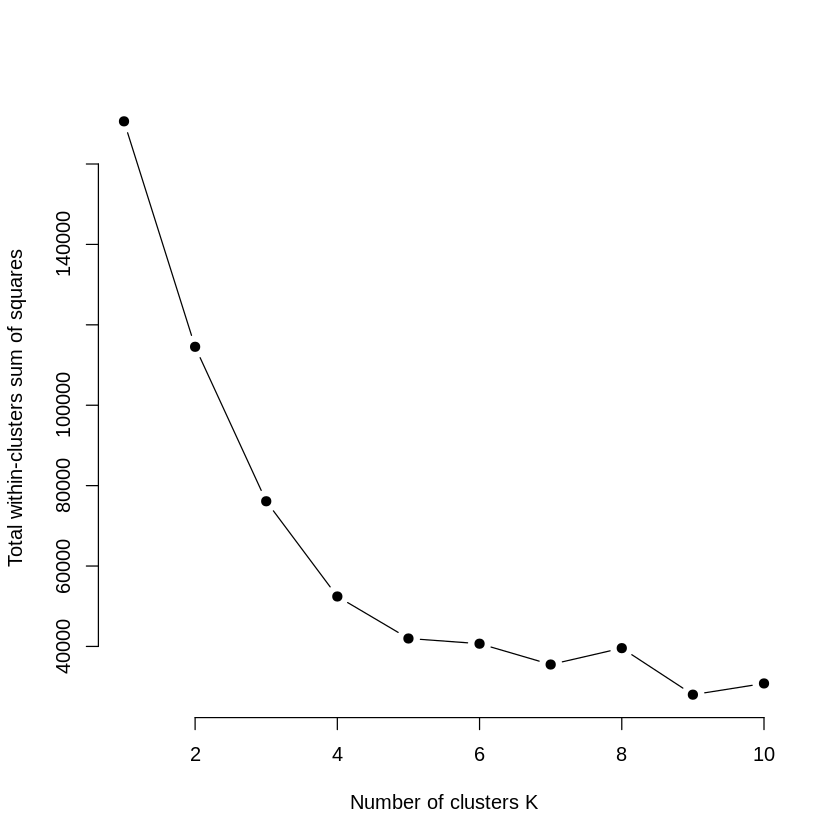

In [8]:
# Elbow method to find best k value
set.seed(123)

# function to compute total within-cluster sum of square 
wss <- function(k) {
  kmeans(males, k, nstart = 10 )$tot.withinss
}

# Compute and plot wss for k = 1 to k = 15
k_values <- 1:10

# extract wss for 2-15 clusters
wss_values <- map_dbl(k_values, wss)

plot(k_values, wss_values,
       type="b", pch = 19, frame = FALSE, 
       xlab="Number of clusters K",
       ylab="Total within-clusters sum of squares")

In [25]:
km <- kmeans(males, centers = 4, nstart = 25)
km[2]

,Cough,Fever,Sore_Throat,Shortness_Of_Breath,Headache,Age_60_And_Above,Contact,Male,Positive
1,0.009580071,0.007782262,0.0005222994,0.0001841793,0.0007834492,0.00000000,0.02352547,1,0.0000000
2,0.121366118,0.168460592,0.0495880812,0.0158770241,0.1104763107,0.04999842,0.00000000,1,1.0000000
3,0.239898869,0.284930592,0.0919715690,0.0244716882,0.2236321137,0.08882316,1.00000000,1,0.8868006
4,0.006413799,0.004638700,0.0002846856,0.0010382651,0.0005526250,1.00000000,0.01483714,1,0.0609897


# **Females:**

In [10]:
females = df[df$Male == 0,]

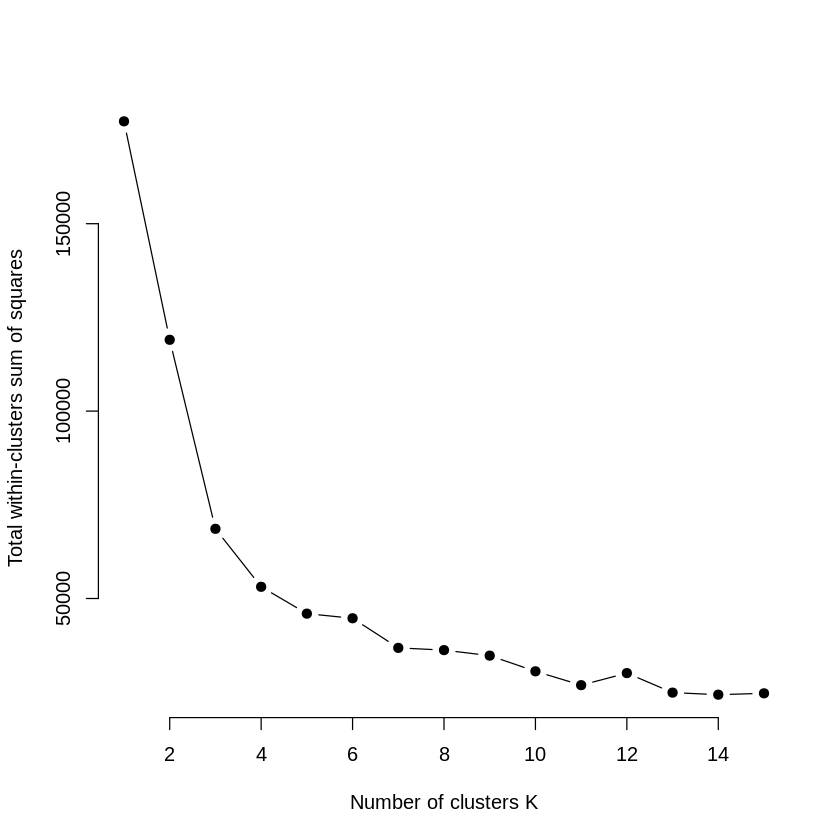

In [11]:
# Elbow method to find best k value
set.seed(123)

# function to compute total within-cluster sum of square 
wss <- function(k) {
  kmeans(females, k, nstart = 10 )$tot.withinss
}

# Compute and plot wss for k = 1 to k = 15
k_values <- 1:15

# extract wss for 2-15 clusters
wss_values <- map_dbl(k_values, wss)

plot(k_values, wss_values,
       type="b", pch = 19, frame = FALSE, 
       xlab="Number of clusters K",
       ylab="Total within-clusters sum of squares")

In [24]:
km <- kmeans(females, centers = 4, nstart = 25)
km[2]

,Cough,Fever,Sore_Throat,Shortness_Of_Breath,Headache,Age_60_And_Above,Contact,Male,Positive
1,0.132864973,0.143441674,0.0688257547,0.0242414885,0.1400833784,0.04435266,0.00000000,0,1.00000000
2,0.010464703,0.007076433,0.0005471740,0.0001841451,0.0008812659,0.00000000,0.00000000,0,0.00000000
3,0.195916473,0.190657386,0.1042227378,0.0258313998,0.2059087394,0.06471771,1.00000000,0,0.62895592
4,0.007625953,0.005344418,0.0004688086,0.0009532442,0.0006094512,1.00000000,0.01329854,0,0.04503688


# **Old:**

In [13]:
old = df[df$Age_60_And_Above == 1,]

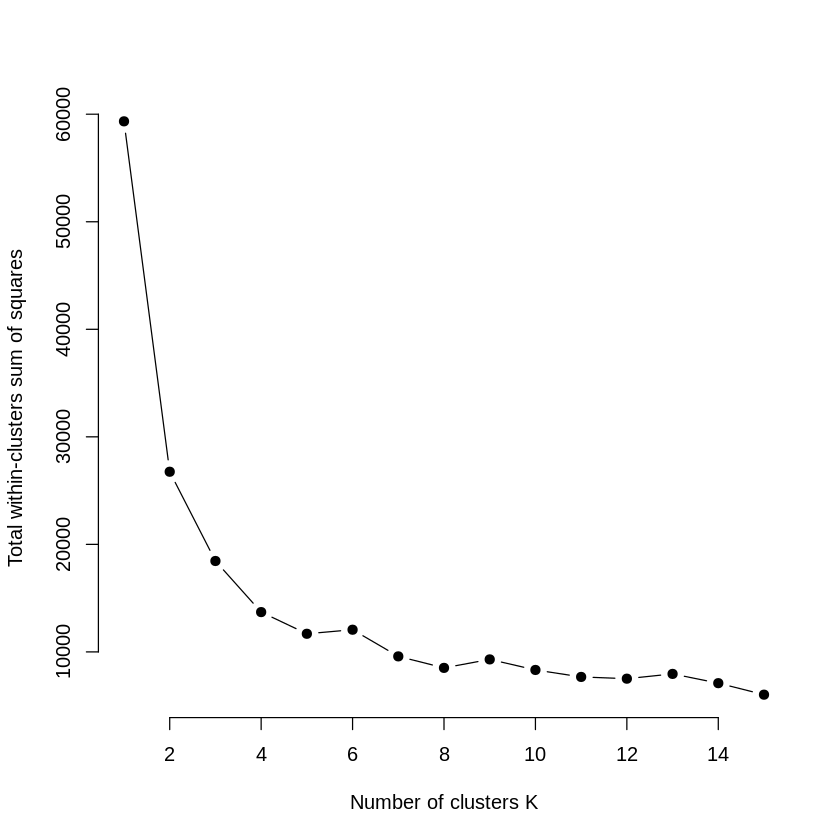

In [14]:
# Elbow method to find best k value
set.seed(123)

# function to compute total within-cluster sum of square 
wss <- function(k) {
  kmeans(old, k, nstart = 10 )$tot.withinss
}

# Compute and plot wss for k = 1 to k = 15
k_values <- 1:15

# extract wss for 2-15 clusters
wss_values <- map_dbl(k_values, wss)

plot(k_values, wss_values,
       type="b", pch = 19, frame = FALSE, 
       xlab="Number of clusters K",
       ylab="Total within-clusters sum of squares")

In [23]:
km = kmeans(old, centers = 3, nstart = 25)
km[2]

,Cough,Fever,Sore_Throat,Shortness_Of_Breath,Headache,Age_60_And_Above,Contact,Male,Positive
1,0.19203120,0.204726216,0.0566687060,0.0325787703,0.1125726522,1,0.29206179,0.5375497,0.998547
2,0.00892361,0.006406694,0.0008825548,0.0006537443,0.0010459909,1,0.01515052,0.0000000,0.000000
3,0.00767833,0.005772109,0.0003563030,0.0005700848,0.0009976484,1,0.01683532,1.0000000,0.000000


# **Young**

In [16]:
young = df[df$Age_60_And_Above == 0,]

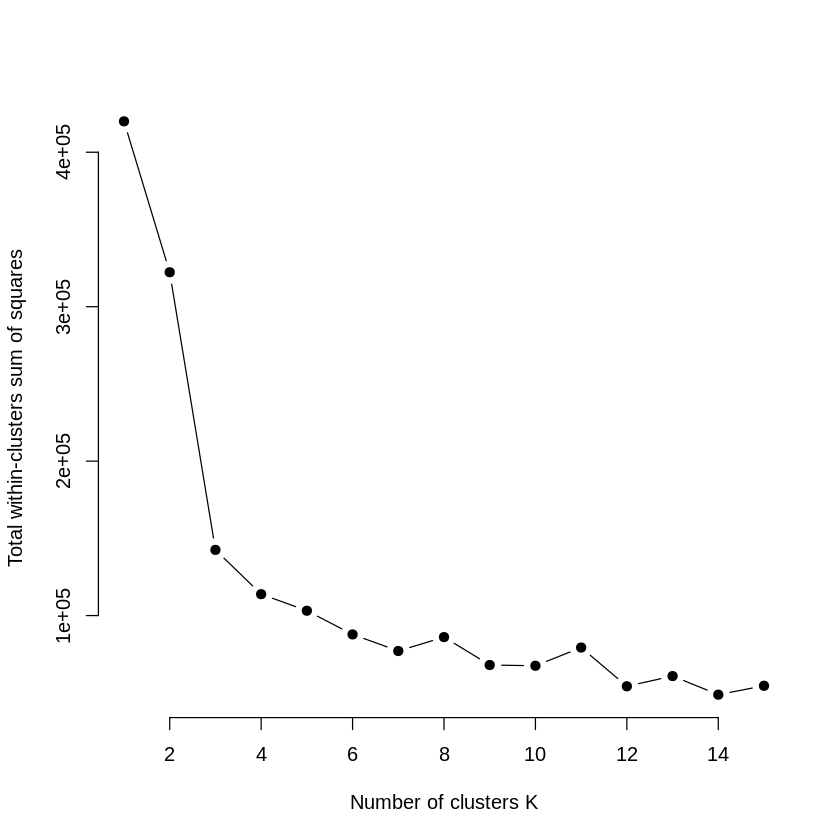

In [17]:
# Elbow method to find best k value
set.seed(123)

# function to compute total within-cluster sum of square 
wss <- function(k) {
  kmeans(young, k, nstart = 10 )$tot.withinss
}

# Compute and plot wss for k = 1 to k = 15
k_values <- 1:15

# extract wss for 2-15 clusters
wss_values <- map_dbl(k_values, wss)

plot(k_values, wss_values,
       type="b", pch = 19, frame = FALSE, 
       xlab="Number of clusters K",
       ylab="Total within-clusters sum of squares")

In [22]:
km = kmeans(young, 3, nstart = 25)
km[2]

,Cough,Fever,Sore_Throat,Shortness_Of_Breath,Headache,Age_60_And_Above,Contact,Male,Positive
1,0.01375348,0.009779801,0.001783946,0.0004364160,0.003356064,0,0.02984218,0.0000000,0.0000000
2,0.15013722,0.180459032,0.079843743,0.0215683237,0.170521447,0,0.39296623,0.5208601,0.9956952
3,0.01240479,0.010376954,0.001002987,0.0003306851,0.002320262,0,0.02921234,1.0000000,0.0000000
